In [ ]:
import pandas as pd
from warnings import catch_warnings
from warnings import filterwarnings
from pandas import read_csv
import io
import matplotlib.pyplot as plt
from datetime import datetime
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import read_csv
from tabulate import tabulate
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
from numpy import array
from datetime import datetime
from google.colab import files

# Ignoring all warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pak20.csv to Pak20.csv


In [ ]:
df = pd.read_csv('Pak20.csv')

In [ ]:
df

,Date,Rate
0,1981,23.832960
1,1982,NaN
2,1983,NaN
3,1984,NaN
4,1985,NaN
5,1986,NaN
6,1987,NaN
7,1988,43.114052
8,1989,NaN
9,1990,NaN


In [ ]:
df1 = df.interpolate(method="linear", limit_direction='both')

In [ ]:
df1

,Date,Rate
0,1981,23.832960
1,1982,26.587402
2,1983,29.341843
3,1984,32.096285
4,1985,34.850727
5,1986,37.605168
6,1987,40.359610
7,1988,43.114052
8,1989,43.700787
9,1990,44.287523


<Figure size 1800x1200 with 0 Axes>

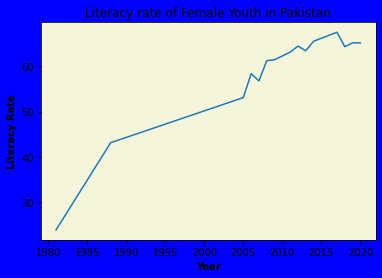

In [ ]:
from matplotlib.image import imread
plt.figure(figsize=(12, 8), dpi=150)
plt.figure(facecolor='blue')
#img = imread("gbg1.jpeg")
#plt.imshow(img)
plt.plot(df1['Date'], df1['Rate'])

# Giving x label using xlabel() method
# with bold setting
plt.xlabel("Year", fontweight='bold')
ax = plt.axes()

# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("beige")

# Giving y label using xlabel() method
# with bold setting
plt.ylabel("Literacy Rate", fontweight='bold')

# Giving title to the plot
plt.title("Literacy rate of Female Youth in Pakistan")

# Showing the plot using plt.show()
plt.show()

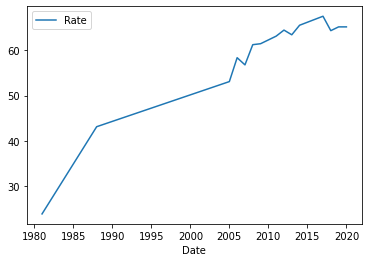

In [ ]:
df1.plot(x= 'Date', y = 'Rate')

In [ ]:
df1.describe()

,Date,Rate
count,40.000000,40.000000
mean,2000.500000,51.065098
std,11.690452,11.869419
min,1981.000000,23.832960
25%,1990.750000,44.727575
50%,2000.500000,50.448248
75%,2010.250000,62.507980
max,2020.000000,67.537132


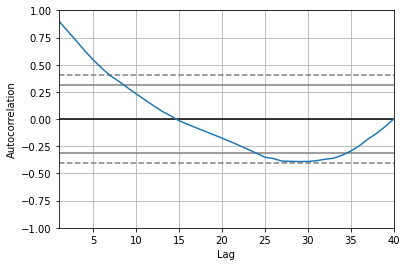

In [ ]:
autocorrelation_plot(df1['Rate'])
plt.show()

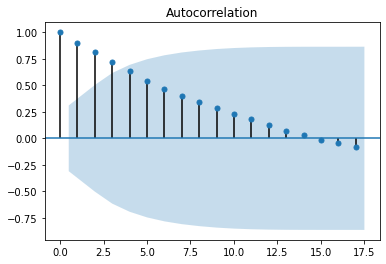

In [ ]:
plot_acf(df1['Rate'])
plt.show()

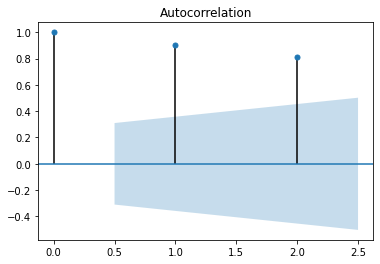

In [ ]:
plot_acf(df1['Rate'], lags = 2)
plt.show()

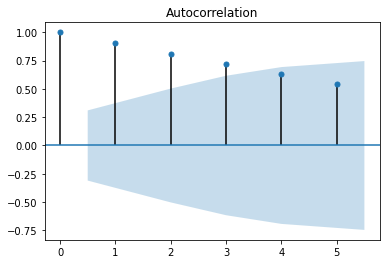

In [ ]:
plot_acf(df1['Rate'], lags = 5)
plt.show()

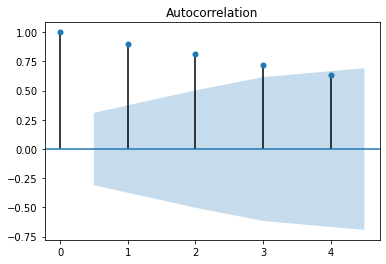

In [ ]:
plot_acf(df1['Rate'], lags = 4)
plt.show()

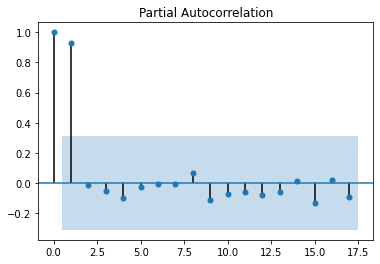

In [ ]:
plot_pacf(df1['Rate'])
plt.show()

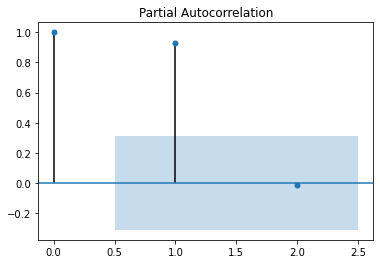

In [ ]:
plot_pacf(df1['Rate'], lags =2)
plt.show()

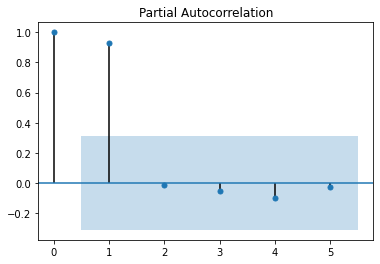

In [ ]:
plot_pacf(df1['Rate'], lags =5)
plt.show()

In [ ]:
#######################################   STATIONARY CHECK  #################################################################

In [ ]:
result = adfuller(df1['Rate'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[0]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

ADF Statistic: -3.405192
p-value: 0.010783
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
Series is stationary


In [ ]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, regression='ct')
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [ ]:
kpss_test(df1['Rate'])

KPSS Statistic: 0.12249299835507005
p-value: 0.09353148452764805
num lags: 10
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is stationary


In [ ]:
#######################################   MODEL   #################################################################

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(3,1,0))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rate   No. Observations:                   39
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -64.985
Method:                       css-mle   S.D. of innovations              1.267
Date:                Thu, 04 Aug 2022   AIC                            139.970
Time:                        23:21:04   BIC                            148.288
Sample:                             1   HQIC                           142.954
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1080      0.514      2.157      0.038       0.101       2.115
ar.L1.D.Rate    -0.1290      0.152     -0.848      0.402      -0.427       0.169
ar.L2.D.Rate     0.4906      0.136      3.620      0.001       0.225       0.756
ar.L3.D.Rate     0.2836      0.175      1.624      0.113      -0.059       0.626
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1814           -0.0000j            1.1814           -0.0000
AR.2           -1.4558           -0.9304j            1.7277           -0.4095
AR.3           -1.4558           +0.9304j            1.7277            0.4095
-----------------------------------------------------------------------------
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(1,0,1))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Rate   No. Observations:                   40
Model:                     ARMA(0, 0)   Log Likelihood                -155.210
Method:                           css   S.D. of innovations             11.720
Date:                Tue, 02 Aug 2022   AIC                            314.420
Time:                        03:25:58   BIC                            317.797
Sample:                             0   HQIC                           315.641
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.0651      1.853     27.556      0.000      47.433      54.697
==============================================================================
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(3,0,1))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Rate   No. Observations:                   40
Model:                     ARMA(3, 1)   Log Likelihood                 -70.668
Method:                       css-mle   S.D. of innovations              1.292
Date:                Sun, 31 Jul 2022   AIC                            153.336
Time:                        21:15:37   BIC                            163.469
Sample:                             0   HQIC                           157.000
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1929     16.341      2.337      0.025       6.166      70.220
ar.L1.Rate     1.3935      0.169      8.244      0.000       1.062       1.725
ar.L2.Rate     0.1391      0.308      0.452      0.654      -0.465       0.743
ar.L3.Rate    -0.5394      0.147     -3.667      0.001      -0.828      -0.251
ma.L1.Rate    -0.4784      0.191     -2.505      0.017      -0.853      -0.104
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0187           -0.0649j            1.0207           -0.0101
AR.2            1.0187           +0.0649j            1.0207            0.0101
AR.3           -1.7795           -0.0000j            1.7795           -0.5000
MA.1            2.0904           +0.0000j            2.0904            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(1,0,0))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Rate   No. Observations:                   40
Model:                     ARMA(1, 0)   Log Likelihood                 -83.238
Method:                       css-mle   S.D. of innovations              1.827
Date:                Sun, 31 Jul 2022   AIC                            172.475
Time:                        21:13:07   BIC                            177.542
Sample:                             0   HQIC                           174.307
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0282     18.993      2.371      0.023       7.803      82.254
ar.L1.Rate     0.9957      0.006    167.749      0.000       0.984       1.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0043           +0.0000j            1.0043            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(3,2,1))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.Rate   No. Observations:                   40
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 -65.332
Method:                       css-mle   S.D. of innovations              1.192
Date:                Sun, 31 Jul 2022   AIC                            142.665
Time:                        18:29:33   BIC                            152.798
Sample:                             2   HQIC                           146.329
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0587      0.026     -2.291      0.028      -0.109      -0.008
ar.L1.D2.Rate    -0.1919      0.154     -1.245      0.221      -0.494       0.110
ar.L2.D2.Rate     0.4244      0.150      2.825      0.008       0.130       0.719
ar.L3.D2.Rate     0.2502      0.153      1.634      0.111      -0.050       0.550
ma.L1.D2.Rate    -1.0000      0.071    -14.002      0.000      -1.140      -0.860
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2919           -0.0000j            1.2919           -0.0000
AR.2           -1.4942           -0.9280j            1.7590           -0.4115
AR.3           -1.4942           +0.9280j            1.7590            0.4115
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(2,1,1))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rate   No. Observations:                   41
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -67.913
Method:                       css-mle   S.D. of innovations              1.257
Date:                Sun, 31 Jul 2022   AIC                            145.825
Time:                        18:22:07   BIC                            154.393
Sample:                             1   HQIC                           148.945
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0827      0.514      2.105      0.042       0.075       2.091
ar.L1.D.Rate     0.2731      0.207      1.318      0.196      -0.133       0.679
ar.L2.D.Rate     0.5058      0.138      3.659      0.001       0.235       0.777
ma.L1.D.Rate    -0.3556      0.217     -1.642      0.109      -0.780       0.069
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1617           +0.0000j            1.1617            0.0000
AR.2           -1.7017           +0.0000j            1.7017            0.5000
MA.1            2.8123           +0.0000j            2.8123            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(2,2,1))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.Rate   No. Observations:                   40
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -66.652
Method:                       css-mle   S.D. of innovations              1.262
Date:                Sun, 31 Jul 2022   AIC                            143.303
Time:                        18:22:22   BIC                            151.747
Sample:                             2   HQIC                           146.356
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0731      0.070     -1.040      0.305      -0.211       0.065
ar.L1.D2.Rate    -0.7261      0.916     -0.792      0.433      -2.522       1.070
ar.L2.D2.Rate    -0.1548      0.735     -0.211      0.834      -1.595       1.285
ma.L1.D2.Rate    -0.3617      0.979     -0.369      0.714      -2.281       1.558
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3452           -0.9795j            2.5415           -0.4370
AR.2           -2.3452           +0.9795j            2.5415            0.4370
MA.1            2.7648           +0.0000j            2.7648            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(1,0,1))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Rate   No. Observations:                   42
Model:                     ARMA(1, 1)   Log Likelihood                 -85.417
Method:                       css-mle   S.D. of innovations              1.745
Date:                Sun, 31 Jul 2022   AIC                            178.835
Time:                        18:22:57   BIC                            185.785
Sample:                             0   HQIC                           181.382
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0557     18.822      2.394      0.022       8.166      81.946
ar.L1.Rate     0.9949      0.007    140.752      0.000       0.981       1.009
ma.L1.Rate     0.1431      0.110      1.300      0.201      -0.073       0.359
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0051           +0.0000j            1.0051            0.0000
MA.1           -6.9857           +0.0000j            6.9857            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(1,0,2))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Rate   No. Observations:                   40
Model:                     ARMA(1, 2)   Log Likelihood                 -73.005
Method:                       css-mle   S.D. of innovations              1.297
Date:                Tue, 02 Aug 2022   AIC                            156.011
Time:                        12:27:27   BIC                            164.455
Sample:                             0   HQIC                           159.064
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5708     20.357      2.239      0.031       5.672      85.469
ar.L1.Rate     0.9928      0.010    100.452      0.000       0.973       1.012
ma.L1.Rate     0.0153      0.074      0.207      0.837      -0.130       0.160
ma.L2.Rate     1.0000      0.128      7.795      0.000       0.749       1.251
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0073           +0.0000j            1.0073            0.0000
MA.1           -0.0077           -1.0000j            1.0000           -0.2512
MA.2           -0.0077           +1.0000j            1.0000            0.2512
-----------------------------------------------------------------------------
"""

In [ ]:
model_A1=ARIMA(df1['Rate'],order=(1,2,1))
model_fit_A1=model_A1.fit()
model_fit_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.Rate   No. Observations:                   40
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -66.684
Method:                       css-mle   S.D. of innovations              1.262
Date:                Sun, 31 Jul 2022   AIC                            141.367
Time:                        18:45:14   BIC                            148.123
Sample:                             2   HQIC                           143.810
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0747      0.061     -1.216      0.232      -0.195       0.046
ar.L1.D2.Rate    -0.5439      0.156     -3.494      0.001      -0.849      -0.239
ma.L1.D2.Rate    -0.5440      0.172     -3.159      0.003      -0.882      -0.207
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8385           +0.0000j            1.8385            0.5000
MA.1            1.8381           +0.0000j            1.8381            0.0000
-----------------------------------------------------------------------------
"""

<Figure size 1800x1200 with 0 Axes>

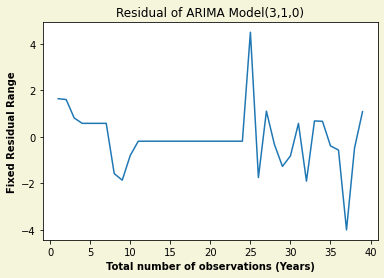

In [ ]:
plt.figure(figsize=(12, 8), dpi=150)
plt.figure(facecolor='beige')
plt.xlabel("Total number of observations (Years)", fontweight='bold')
ax = plt.axes()
ax.set_facecolor("white")
plt.ylabel("Fixed Residual Range", fontweight='bold')

# Giving title to the plot
plt.title("Residual of ARIMA Model(3,1,0)")

residuals = pd.DataFrame(model_fit_A1.resid)
plt.plot(residuals)
#residuals.plot()
#residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

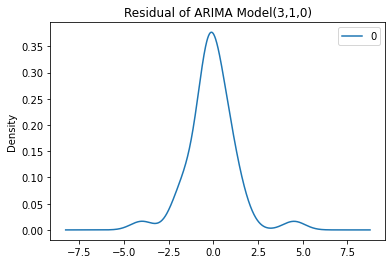

In [ ]:
residuals = pd.DataFrame(model_fit_A1.resid)
residuals.plot(kind='kde', title ='Residual of ARIMA Model(3,1,0)', xlabel = 'Density', ylabel ='Total number of observations')

plt.show()

In [ ]:
residuals

<Figure size 1800x1200 with 0 Axes>

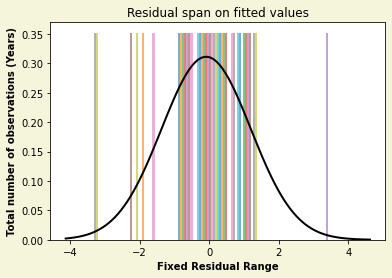

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(12, 8), dpi=150)
plt.figure(facecolor='beige')

plt.ylabel("Total number of observations (Years)", fontweight='bold')
ax = plt.axes()


ax.set_facecolor("white")


plt.xlabel("Fixed Residual Range", fontweight='bold')



residuals = pd.DataFrame(model_fit_A1.resid)
mu, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins= 3, density=True, alpha=0.6)
#residuals.plot(kind='hist', title="Residuals")


# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
#title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title("Residual span on fitted values")

plt.show()

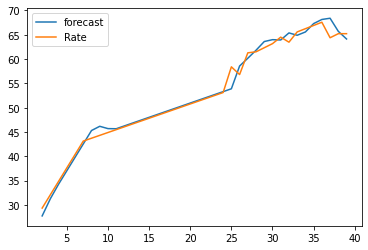

In [ ]:
model_fit_A1.plot_predict(dynamic=False)
plt.show()

In [ ]:
fcast1 = model_fit_A1.forecast(37)
print (fcast1[0])

[ 65.08485991  65.72793657  65.98870028  66.63514705  67.25518826
  67.95944395  68.74925091  69.56184949  70.43736208  71.34020021
  72.27684291  73.24037175  74.22476593  75.22924523  76.24899447
  77.28254474  78.32750188  79.38208862  80.44494308  81.51469007
  82.59033486  83.67094489  84.75576247  85.84414573  86.9355413
  88.0294908   89.12559984  90.22353749  91.32302297  92.42381832
  93.52572261  94.62856541  95.73220265  96.83651231  97.94139112
  99.0467517  100.15252004]


In [ ]:
list1 = range(2021, 2058)

In [ ]:
dfch = pd.DataFrame((zip(list1, fcast1[0])),
               columns =['Date', 'Rate'])
print(dfch)

    Date        Rate
0   2021   65.084860
1   2022   65.727937
2   2023   65.988700
3   2024   66.635147
4   2025   67.255188
5   2026   67.959444
6   2027   68.749251
7   2028   69.561849
8   2029   70.437362
9   2030   71.340200
10  2031   72.276843
11  2032   73.240372
12  2033   74.224766
13  2034   75.229245
14  2035   76.248994
15  2036   77.282545
16  2037   78.327502
17  2038   79.382089
18  2039   80.444943
19  2040   81.514690
20  2041   82.590335
21  2042   83.670945
22  2043   84.755762
23  2044   85.844146
24  2045   86.935541
25  2046   88.029491
26  2047   89.125600
27  2048   90.223537
28  2049   91.323023
29  2050   92.423818
30  2051   93.525723
31  2052   94.628565
32  2053   95.732203
33  2054   96.836512
34  2055   97.941391
35  2056   99.046752
36  2057  100.152520


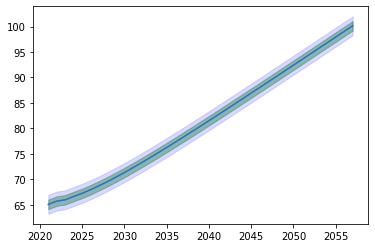

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
# Create the data set
x = dfch['Date']
y = dfch['Rate']
#Define the confidence interval
ci = 7* np.std(y) / np.mean(y)
# Plot the sinus function
plt.plot(x, y)
# Plot the confidence interval
plt.fill_between(x, (y-ci), (y+ci), color='green', alpha=0.35)
plt.fill_between(x, (y-2*ci), (y+2*ci), color='blue', alpha=0.15)
plt.show()

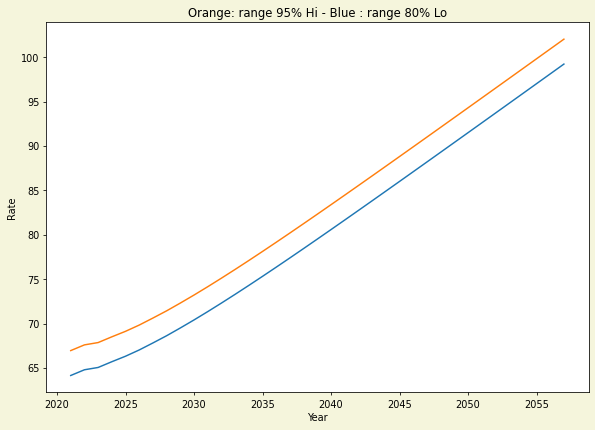

In [ ]:
plt.figure(figsize=(10, 7), dpi=70, facecolor='beige')
plt.title("Orange: range 95% Hi - Blue : range 80% Lo")

x = dfch['Date']
y = dfch['Rate']
#Define the confidence interval
ci = 7* np.std(y) / np.mean(y)

plt.xlabel('Year')
plt.ylabel('Rate')
# Plot the sinus function
plt.plot(x, y-ci)
plt.plot(x, y+2*ci)


plt.show()

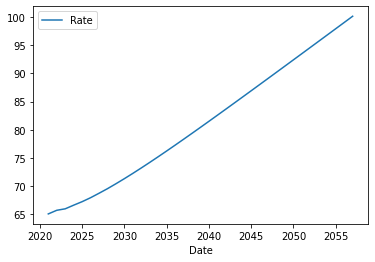

In [ ]:
dfch.plot(x='Date', y ='Rate')
plt.show()

In [ ]:
vertical_concat = pd.concat([df1, dfch], axis=0)

In [ ]:
vertical_concat

,Date,Rate
0,1981,23.832960
1,1982,26.587402
2,1983,29.341843
3,1984,32.096285
4,1985,34.850727
...,...,...
32,2053,95.732203
33,2054,96.836512
34,2055,97.941391
35,2056,99.046752


In [ ]:
testing = pd.concat([df, dfch[17:]], axis=0)

In [ ]:
testing

,Date,Rate
0,1981,23.832960
1,1982,NaN
2,1983,NaN
3,1984,NaN
4,1985,NaN
5,1986,NaN
6,1987,NaN
7,1988,43.114052
8,1989,NaN
9,1990,NaN


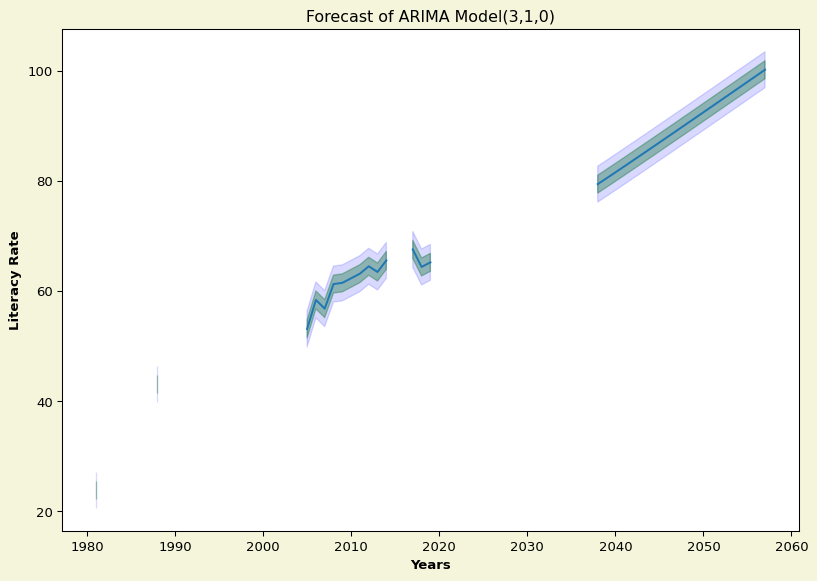

In [ ]:
plt.figure(figsize=(10, 7), dpi=95, facecolor='beige')
#plt.figure(facecolor='beige')

plt.ylabel("Literacy Rate", fontweight='bold')
ax = plt.axes()


ax.set_facecolor("white")

plt.title("Forecast of ARIMA Model(3,1,0)")

plt.xlabel("Years", fontweight='bold')
# Create the data set
x = testing['Date']
y = testing['Rate']
#Define the confidence interval
ci = 7* np.std(y) / np.mean(y)
# Plot the sinus function
plt.plot(x, y)
# Plot the confidence interval
plt.fill_between(x, (y-ci), (y+ci), color='green', alpha=0.35)
plt.fill_between(x, (y-2*ci), (y+2*ci), color='blue', alpha=0.15)
plt.show()

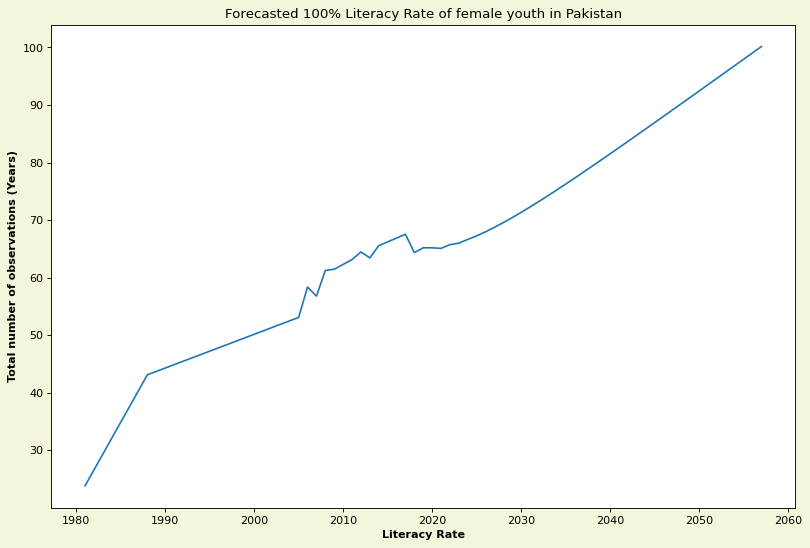

In [ ]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='beige')
plt.ylabel("Total number of observations (Years)", fontweight='bold')
ax = plt.axes()
ax.set_facecolor("white")
plt.xlabel("Literacy Rate", fontweight='bold')
plt.title("Forecasted 100% Literacy Rate of female youth in Pakistan")
x = vertical_concat['Date']
y = vertical_concat['Rate']
plt.plot(x, y)
plt.show()

<Figure size 1500x1200 with 0 Axes>

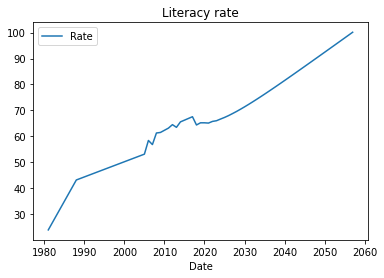

In [ ]:
plt.figure(figsize=(10, 8), dpi=150)
vertical_concat.plot(x='Date', y ='Rate')
plt.title('Literacy rate')
plt.legend()
plt.show()

In [ ]:
#######################################   BEST MODEL   #################################################################

In [ ]:
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [ ]:
def train_test_split(data, n_train):
	return data[0:n_train], data[n_train:]
  #return data[n_train:], data[n_train:]

In [ ]:
import math
def evaluate_arima_model(data, arima_order, train_data_size_percent = 0.66, logging = False):
  # prepare training dataset
  train_size = int(len(data) * train_data_size_percent)
  train, test = train_test_split(data, train_size)
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    if (logging):
      print(model_fit.summary())
    yhat = model_fit.forecast()[0]
    #yhat = np.round(yhat, decimals = 3)
    predictions.append(yhat)
    history.append(test[t])

  # calculate out of sample error
  error = mean_squared_error(test, predictions)
  mape = np.mean(np.abs(predictions - test)/np.abs(test))
  me = np.mean(predictions - test)             # ME
  mae = np.mean(np.abs(predictions - test))    # MAE
  mpe = np.mean((predictions - test)/test)   # MPE
  #rmse = np.mean((predictions - test)**2)**.5  # RMSE
  rmse = math.sqrt(mean_squared_error(test,predictions))
  #rmse = measure_rmse(test, predictions)
  return error, test, predictions, mape, me, rmse, mpe, mae

In [ ]:
def grid_search_arima(dataset,  p_values= range(0, 6), d_values= range(0, 3), q_values= range(0, 6)):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        if (d <= 2) and (p + d + q <= 5):
          order = (p,d,q)
          try:
            mse, test, predictions, a, b, c, d, f = evaluate_arima_model(dataset, order)
            if mse < best_score:
              best_score, best_cfg, mape, me, rmse, mpe, mae = mse, order, a ,b, c, d, f
            print('ARIMA%s MSE=%.3f MAPE=%.3f ME=%.3f RSME=%3.f MPE=%3.f MAE=%3.f' % (order,best_score, mape, me, rmse, mpe,mae))
          except Exception as e:
            print ('ARIMA'+ str(order)+ ' Exception occured at this configuration')
            continue
  print('Best ARIMA%s MSE=%.3f MAPE=%.3f ME=%.3f RSME=%3.f MPE=%3.f, MAE=%3.f' % (best_cfg, best_score, mape, me, rmse, mpe, mae))

In [ ]:
grid_search_arima(df1['Rate'].values)

ARIMA(0, 0, 0) MSE=266.254 MAPE=0.253 ME=-16.242 RSME= 16 MPE= -0 MAE= 16
ARIMA(0, -0.25303634552871734, 1) Exception occured at this configuration
ARIMA(0, -0.25303634552871734, 2) Exception occured at this configuration
ARIMA(0, -0.25303634552871734, 3) Exception occured at this configuration
ARIMA(0, -0.25303634552871734, 4) Exception occured at this configuration
ARIMA(0, -0.25303634552871734, 5) Exception occured at this configuration
ARIMA(0, 1, 0) MSE=3.487 MAPE=0.051 ME=0.778 RSME=  2 MPE=  0 MAE=  3
ARIMA(0, 0.014062616801567195, 1) Exception occured at this configuration
ARIMA(0, 0.014062616801567195, 2) Exception occured at this configuration
ARIMA(0, 0.014062616801567195, 3) Exception occured at this configuration
ARIMA(0, 0.014062616801567195, 4) Exception occured at this configuration
ARIMA(0, 2, 0) MSE=3.487 MAPE=0.051 ME=0.778 RSME=  2 MPE=  0 MAE=  3
ARIMA(0, 0.006858372365885393, 1) Exception occured at this configuration
ARIMA(0, 0.006858372365885393, 2) Exception oc

[56.7849617  61.24991989 61.46266174 62.29837036 63.1368103  64.47409821
 63.43799973 65.54779053 66.21090444 66.87401835 67.53713226 64.35005188
 65.18557739 65.18557739]
[array([58.25924297]), array([56.67051293]), array([61.12858231]), array([61.34715047]), array([62.18918754]), array([63.03338154]), array([64.37606368]), array([63.3402197]), array([65.45409699]), array([66.12140562]), array([66.78839969]), array([67.45511268]), array([64.25735913]), array([65.09664652])]
MSE=3.221 MAPE=0.050 ME=-0.587 RSME=  2 MPE= -0, MAE=  3


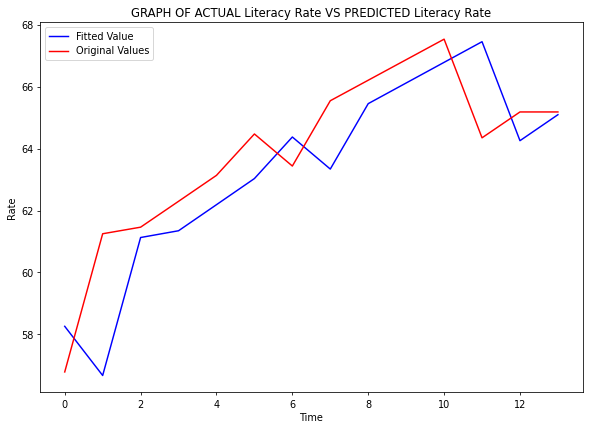

In [ ]:
mse, test, predictions, a, b, c, d, f = evaluate_arima_model(df1['Rate'].values, (1,0,0))
print(test)
print(predictions)
print('MSE=%.3f MAPE=%.3f ME=%.3f RSME=%3.f MPE=%3.f, MAE=%3.f' % (mse, a, b, c, d, f))


plt.figure(figsize=(10, 7), dpi=70)
plt.plot(predictions, label='Fitted Value', color='blue')
plt.plot(test, label = "Original Values", color='red')

# adding title to the plot
plt.title('GRAPH OF ACTUAL Literacy Rate VS PREDICTED Literacy Rate')
plt.ylabel('Rate')
plt.xlabel('Time')

# adding legend to the curve
plt.legend()
plt.show()
